In [19]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import workingDataPath, getWorkingHypnoDfParquet, regroupHypno, graphHypnoDate
import pandas as pd

ouraHypnoDF = getWorkingHypnoDfParquet("oura")
ouraHypnoDF['startDate'] = ouraHypnoDF.index
ouraHypnoDF

,endDate,value,startDate
startDate,,,
2020-10-15 01:03:59-07:00,2020-10-15 01:08:59-07:00,0,2020-10-15 01:03:59-07:00
2020-10-15 01:08:59-07:00,2020-10-15 01:13:59-07:00,1,2020-10-15 01:08:59-07:00
2020-10-15 01:13:59-07:00,2020-10-15 01:18:59-07:00,0,2020-10-15 01:13:59-07:00
2020-10-15 01:18:59-07:00,2020-10-15 01:28:59-07:00,1,2020-10-15 01:18:59-07:00
2020-10-15 01:28:59-07:00,2020-10-15 01:43:59-07:00,2,2020-10-15 01:28:59-07:00
...,...,...,...
2023-08-10 16:05:02-07:00,2023-08-10 16:25:02-07:00,2,2023-08-10 16:05:02-07:00
2023-08-10 16:25:02-07:00,2023-08-10 16:30:02-07:00,1,2023-08-10 16:25:02-07:00
2023-08-10 16:30:02-07:00,2023-08-10 16:40:02-07:00,0,2023-08-10 16:30:02-07:00


In [20]:
len(set(ouraHypnoDF.index.date))

907

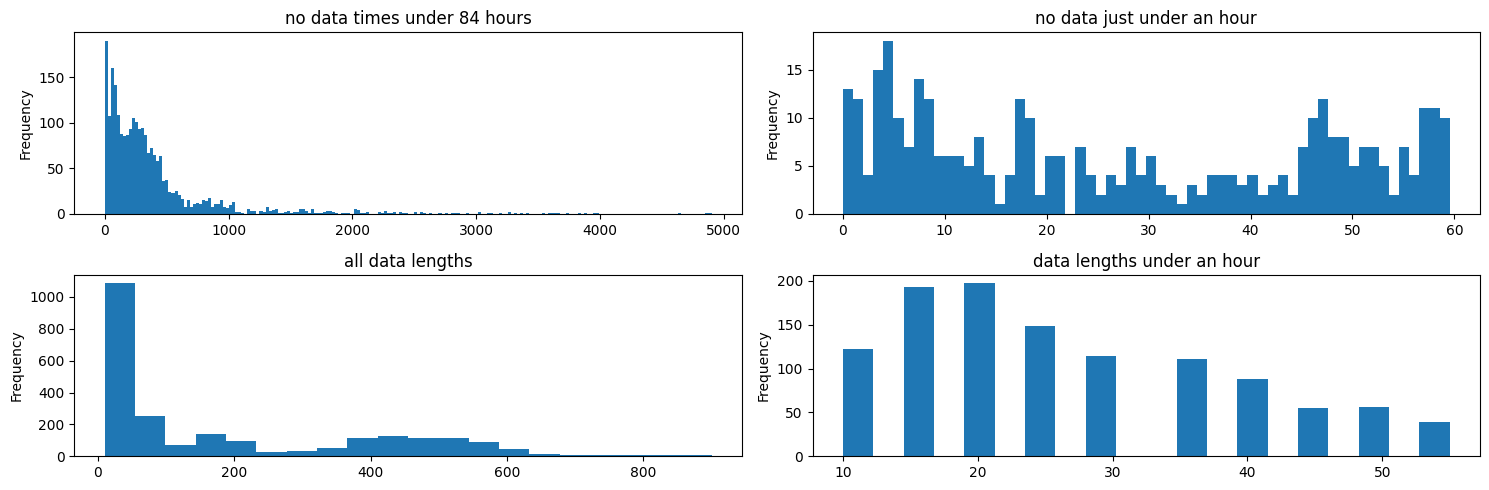

In [21]:
groupedByNoData = regroupHypno(ouraHypnoDF, [-1])
noDataTimes = groupedByNoData[groupedByNoData['value'] == 1]
dataTimes = groupedByNoData[groupedByNoData['value'] == 0]

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(15, 5))

noDataTimes[noDataTimes['durationInMin'] < 5000].durationInMin.plot.hist(bins=200, ax=axs[0,0])
axs[0,0].set_title("no data times under 84 hours")

noDataTimes[noDataTimes['durationInMin'] < 60].durationInMin.plot.hist(bins=60, ax=axs[0,1])
axs[0,1].set_title('no data just under an hour')

dataTimes[dataTimes['durationInMin'] < 10000].durationInMin.plot.hist(bins=20, ax=axs[1,0])
axs[1,0].set_title('all data lengths')

dataTimes[dataTimes['durationInMin'] < 60].durationInMin.plot.hist(bins=20, ax=axs[1,1])
axs[1,1].set_title('data lengths under an hour')

plt.tight_layout()
plt.show()

In [22]:
groupedByAsleep = regroupHypno(ouraHypnoDF, [1,2,3])
awakeOrNoDataTimes = groupedByAsleep[groupedByAsleep['value'] == 0]
sleepTimes = groupedByAsleep[groupedByAsleep['value'] == 1]

<AxesSubplot:>

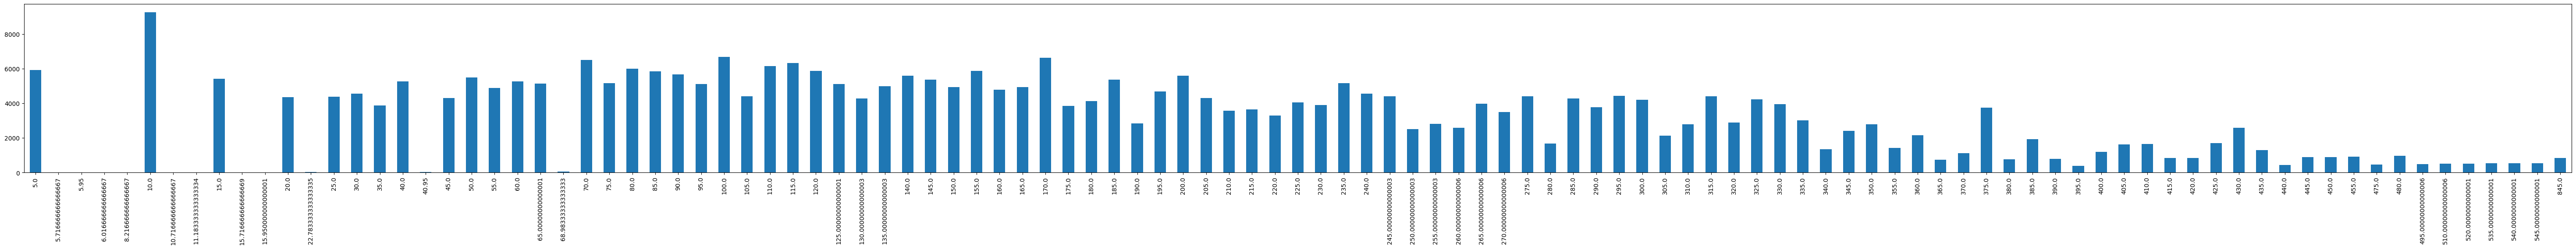

In [23]:
overallDurationList = (sleepTimes.durationInMin.value_counts().index *
                       sleepTimes.durationInMin.value_counts().values
                       ).to_list()
sleepTimesOverallDurations = pd.Series(index=sleepTimes.durationInMin.value_counts().index, 
                                       data=overallDurationList)

sleepTimesOverallDurations = sleepTimesOverallDurations.sort_index()

sleepTimesOverallDurations.plot.bar(figsize=(75, 5))

<AxesSubplot:ylabel='Frequency'>

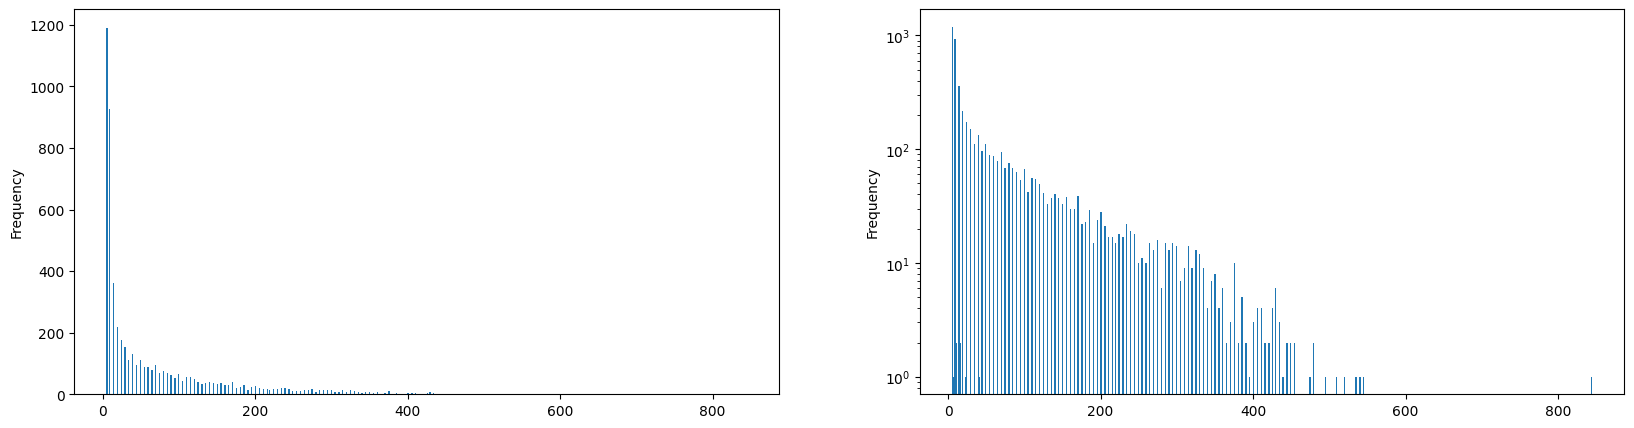

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sleepTimes.durationInMin.plot.hist(bins=500, ax=axs[0])
sleepTimes.durationInMin.plot.hist(bins=500, log=True, ax=axs[1])

In [25]:
len(set(ouraHypnoDF.index.date))

907

In [26]:
print(sorted(list(set(ouraHypnoDF.index.date)))[0])
print(sorted(list(set(ouraHypnoDF.index.date)))[-1])

2020-10-15
2023-08-30


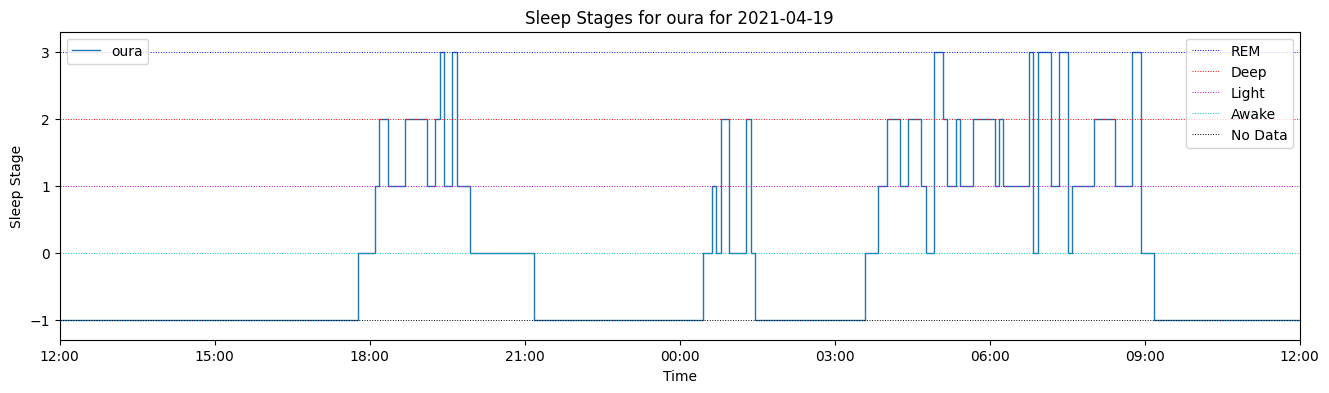

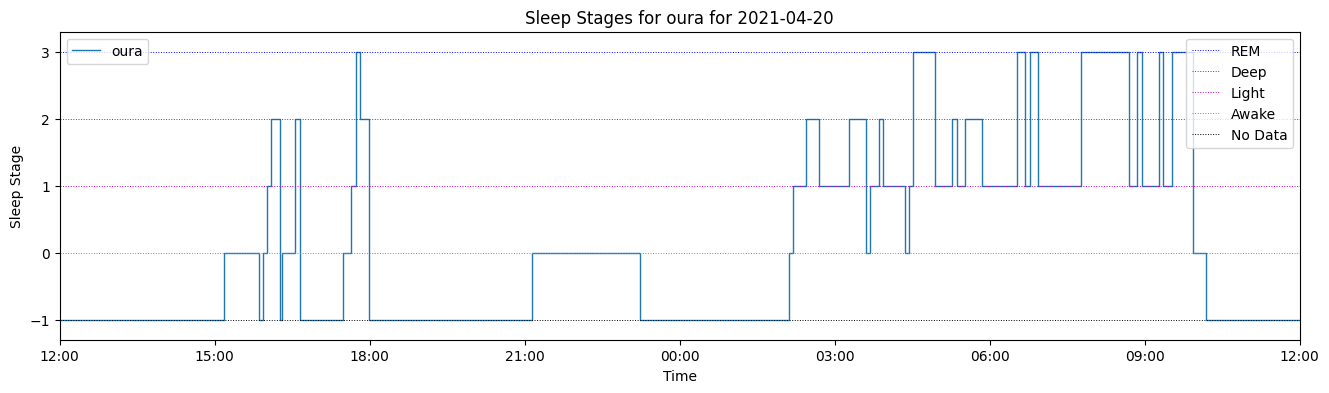

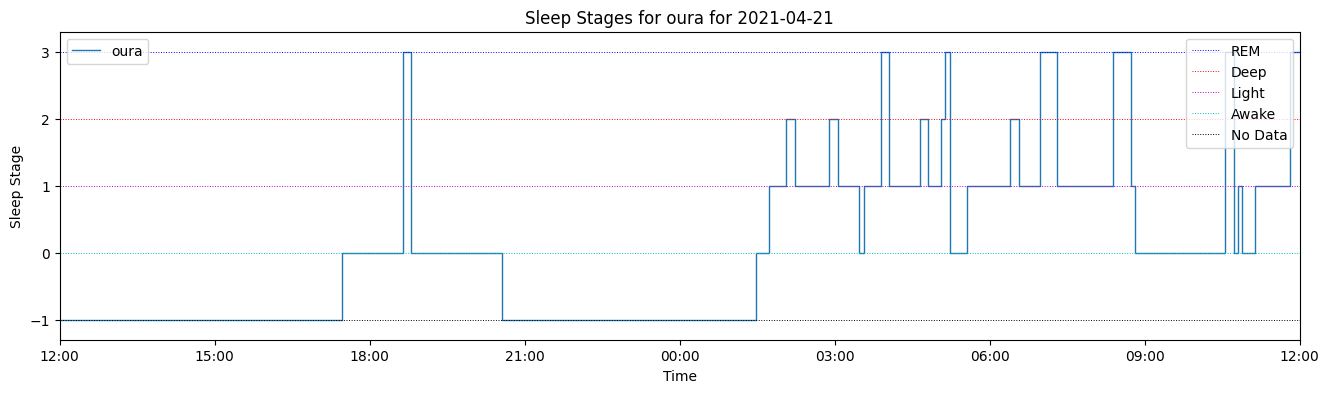

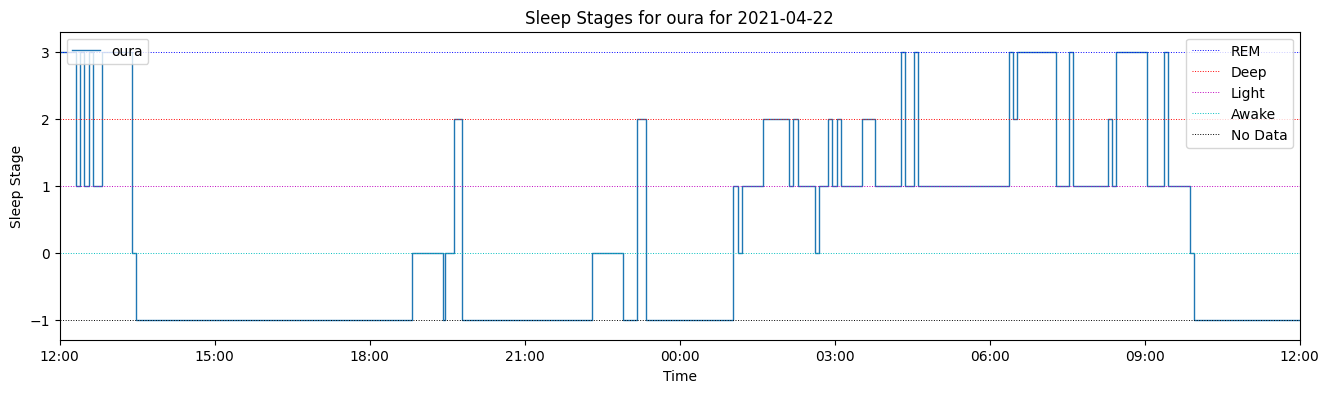

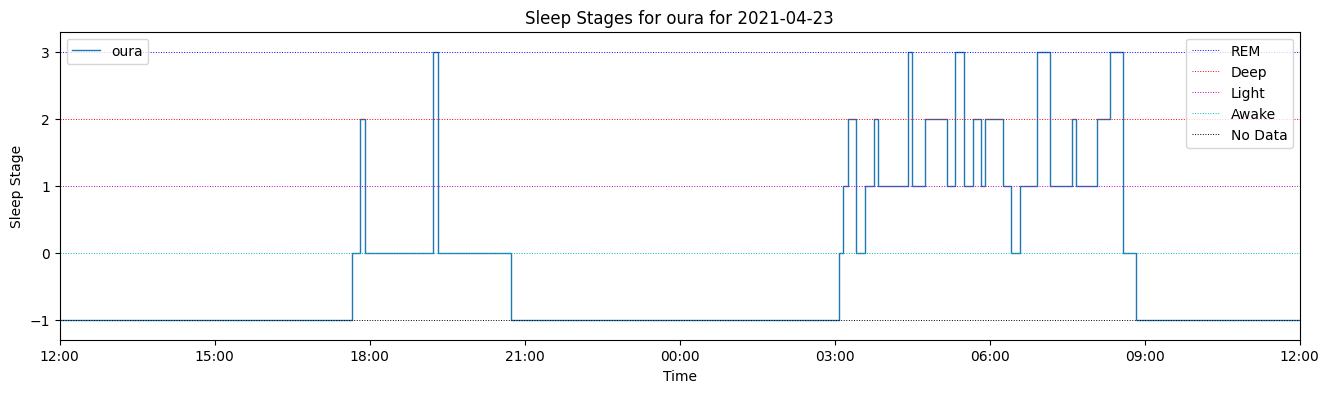

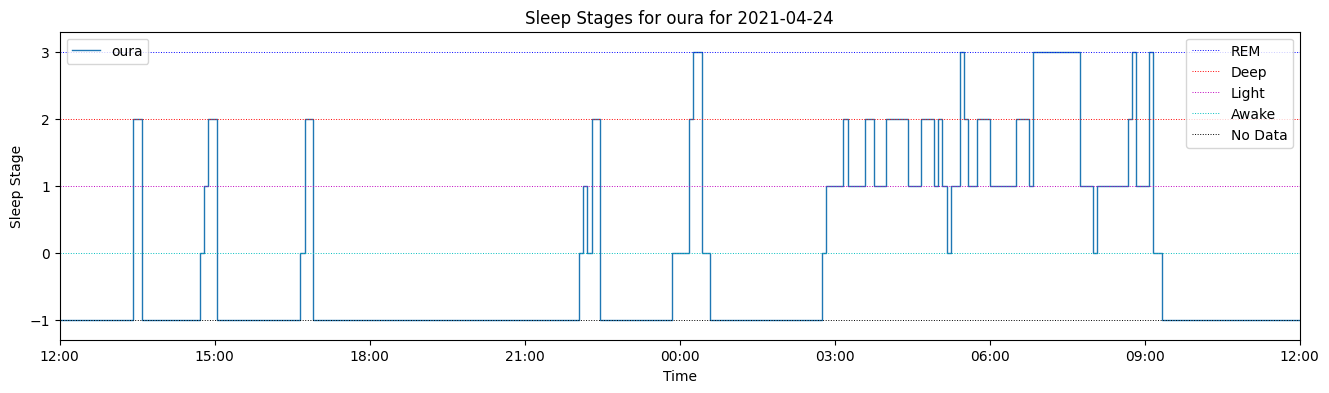

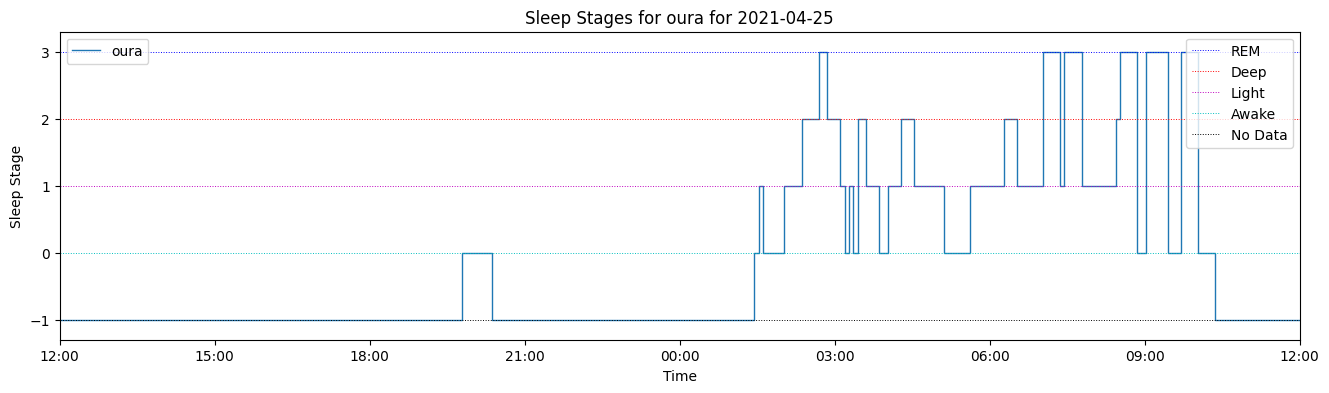

In [30]:
from datetime import date, timedelta
for i in range(7):
    graphHypnoDate(ouraHypnoDF, date(2021,4,19) + timedelta(days=i), 'oura')